In [35]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import string

import time

from ast import literal_eval

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import MaxKColorGenerator, ContinuousPeaksGenerator, TSPGenerator,FlipFlopGenerator,KnapsackGenerator
from mlrose_hiive import SARunner, GARunner, MIMICRunner, RHCRunner

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [36]:
# helper funcs

def percent_diff(x,y):
    return (2*(x-y))/(x+y)

def fitness_mean(runs_arr):
    # extract fitness values
    fitness_list = []
    for run in runs_arr:
        fitness = run['Fitness'].max()
        fitness_list.append(fitness)
    return np.mean(fitness_list)

def fitness_var(runs_arr):
    # extract fitness values
    fitness_list = []
    for run in runs_arr:
        fitness = run['Fitness'].max()
        fitness_list.append(fitness)
    return np.var(fitness_list)

def fitness_std(runs_arr):
    # extract fitness values
    fitness_list = []
    for run in runs_arr:
        fitness = run['Fitness'].max()
        fitness_list.append(fitness)
    return np.std(fitness_list)

def feval_mean(runs_arr):
    # extract fitness values
    feval_list = []
    for run in runs_arr:
        feval = run['FEvals'].max()
        feval_list.append(feval)
    return np.mean(feval_list)

def feval_var(runs_arr):
    # extract fitness values
    feval_list = []
    for run in runs_arr:
        feval = run['FEvals'].max()
        feval_list.append(feval)
    return np.var(feval_list)

def feval_std(runs_arr):
    # extract fitness values
    feval_list = []
    for run in runs_arr:
        feval = run['FEvals'].max()
        feval_list.append(feval)
    return np.std(feval_list)


def time_mean(runs_arr):
    # extract fitness values
    time_list = []
    for run in runs_arr:
        time = run['Time'].max()
        time_list.append(time)
    return np.mean(time_list)

def time_var(runs_arr):
    # extract fitness values
    time_list = []
    for run in runs_arr:
        time = run['Time'].max()
        time_list.append(time)
    return np.var(time_list)

def time_std(runs_arr):
    # extract fitness values
    time_list = []
    for run in runs_arr:
        time = run['Time'].max()
        time_list.append(time)
    return np.std(time_list)

# given an array of runs, print mean and var for each size
def print_stats(runs_2d):
    for runs_arr in runs_2d:
        print("***RUN STATS***")
        print("mean fitness:",fitness_mean(runs_arr))
        print("VAR fitness:",fitness_var(runs_arr))
        print("STD fitness:",fitness_std(runs_arr))
        print("mean feval:", feval_mean(runs_arr))
        print("VAR feval:", feval_var(runs_arr))
        print("STD feval:", feval_std(runs_arr))
        print("mean runtime:", time_mean(runs_arr))
        print("var runtime:", time_var(runs_arr))
        print("STD runtime:", time_std(runs_arr))

def sa_params(runs_arr):
    print("***SA PARAMS***")
    for run in runs_arr:
        print("best params")
        print("Temp:", run.iloc[0]['Temperature'])

def ga_params(runs_arr):
    print("***GA PARAMS***")
    for run in runs_arr:
        print("best params")
        print("Population size:", run.iloc[0]['Population Size'])
        print("Mutation rate:", run.iloc[0]['Mutation Rate'])
        

def mmc_params(runs_arr):
    print("***MMC PARAMS***")
    for run in runs_arr:
        print("best params")
        print("Population size:", run.iloc[0]['Population Size'])
        print("Keep Percent:", run.iloc[0]['Keep Percent'])

In [37]:
problem_sizes = [10,20,30,40]
problems = []

for size in problem_sizes:
    problem = KnapsackGenerator().generate(
        number_of_items_types = size,
        max_item_count= size//2,
        seed=np.random.randint(0,1000))
    problems.append(problem)

In [38]:
# Randomized Hill Climbing
# create a runner class and solve the problem with 5 random seeds
rhc_runs = [[] for i in range(len(problems))]

for i in range(len(problems)):
    problem = problems[i]
    for j in range(3):
        # init runner with random seed
        rhc = RHCRunner(problem=problem,
                    experiment_name='max_k_rhc',
                    output_directory=None,
                    seed=np.random.randint(0,1000),
                    iteration_list=2 ** np.arange(14),
                    max_attempts=20,
                    restart_list=[25])   
        
        # the two data frames will contain the results
        df_run_stats, df_run_curves = rhc.run()
        # extract best runs in terms of fitness
        best_fitness = df_run_curves['Fitness'].max()
        best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
        # extract min eval out of best fitness runs
        minimum_evaluations = best_runs['FEvals'].min()
        best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
        
        # id the best params        
        best_restarts = best_curve_run['Restarts'].iloc()[0]
        run_stats_best_run = df_run_stats[df_run_stats['Restarts'] == best_restarts]      
        # save run to array
        rhc_runs[i].append(run_stats_best_run)


In [39]:
HTML(rhc_runs[0][0].to_html())

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
0,0,172.0,0,0.000096,"[1, 4, 3, 1, 2, 2, 4, 2, 4, 3]",25,8192,0
1,1,172.0,1,0.001623,"[1, 4, 3, 1, 2, 2, 4, 2, 4, 3]",25,8192,0
2,2,172.0,2,0.002849,"[1, 4, 3, 1, 2, 2, 4, 2, 4, 3]",25,8192,0
3,4,172.0,4,0.003985,"[1, 4, 3, 1, 2, 2, 4, 2, 4, 3]",25,8192,0
4,8,178.0,9,0.005436,"[1, 4, 3, 1, 3, 2, 4, 2, 4, 3]",25,8192,0
5,16,178.0,17,0.007012,"[1, 4, 3, 1, 3, 2, 4, 2, 4, 3]",25,8192,0
6,32,200.0,36,0.009226,"[2, 4, 3, 2, 3, 4, 4, 2, 4, 3]",25,8192,0
7,64,200.0,49,0.013610,"[2, 4, 3, 2, 3, 4, 4, 2, 4, 3]",25,8192,0
8,128,200.0,49,0.013610,"[2, 4, 3, 2, 3, 4, 4, 2, 4, 3]",25,8192,0
9,256,200.0,49,0.013610,"[2, 4, 3, 2, 3, 4, 4, 2, 4, 3]",25,8192,0


In [40]:
print_stats(rhc_runs)

***RUN STATS***
mean fitness: 227.66666666666666
VAR fitness: 10.888888888888888
STD fitness: 3.2998316455372216
mean feval: 1284.6666666666667
VAR feval: 969.5555555555555
STD feval: 31.13768706175132
mean runtime: 0.6255915333458688
var runtime: 0.00245647805652687
STD runtime: 0.049562869736596876
***RUN STATS***
mean fitness: 759.6666666666666
VAR fitness: 197.55555555555557
STD fitness: 14.055445761538678
mean feval: 1659.3333333333333
VAR feval: 5069.555555555556
STD feval: 71.20081148101863
mean runtime: 0.7371023999973355
var runtime: 0.0013184642786163887
STD runtime: 0.036310663428480466
***RUN STATS***
mean fitness: 1734.0
VAR fitness: 368.6666666666667
STD fitness: 19.200694431886227
mean feval: 1877.0
VAR feval: 21770.666666666668
STD feval: 147.5488619633058
mean runtime: 0.8098008666614381
var runtime: 0.0011405159574997196
STD runtime: 0.03377152583908106
***RUN STATS***
mean fitness: 2551.3333333333335
VAR fitness: 2459.5555555555557
STD fitness: 49.59390643572611
mean

In [41]:
# Simulated Annealing
# create a runner class and solve the problem with 5 random seeds

sa_runs = [[] for i in range(len(problems))]

for i in range(len(problems)):
    problem = problems[i]
    for j in range(3):
        # init runner with random seed
        sa = SARunner(problem=problem,
                  experiment_name='max_k_sa',
                  output_directory=None,
                  seed=np.random.randint(0,1000),
                  iteration_list=2 ** np.arange(14),
                  max_attempts=20,
                  temperature_list=[1000],
                  decay_list=[mlrose_hiive.GeomDecay])
        
        # the two data frames will contain the results
        df_run_stats, df_run_curves = sa.run()
        # extract best runs in terms of fitness
        best_fitness = df_run_curves['Fitness'].max()
        best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
        # extract min eval out of best fitness runs
        minimum_evaluations = best_runs['FEvals'].min()
        best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
        
        # id the best params        
        best_init_temperature = best_curve_run['Temperature'].iloc()[0].init_temp
        run_stats_best_run = df_run_stats[df_run_stats['schedule_init_temp'] == best_init_temperature]      
        # save run to array
        sa_runs[i].append(run_stats_best_run)


In [42]:
print_stats(sa_runs)

***RUN STATS***
mean fitness: 221.0
VAR fitness: 18.666666666666668
STD fitness: 4.320493798938574
mean feval: 1033.0
VAR feval: 674.0
STD feval: 25.96150997149434
mean runtime: 0.08267696666492459
var runtime: 0.00017245067172698173
STD runtime: 0.013132047507033385
***RUN STATS***
mean fitness: 761.6666666666666
VAR fitness: 896.8888888888888
STD fitness: 29.948103260288267
mean feval: 1015.3333333333334
VAR feval: 74.8888888888889
STD feval: 8.65383665716478
mean runtime: 0.06905790000261429
var runtime: 3.364788241793687e-05
STD runtime: 0.005800679478986653
***RUN STATS***
mean fitness: 1764.3333333333333
VAR fitness: 3264.8888888888887
STD fitness: 57.13920623257632
mean feval: 936.0
VAR feval: 1638.0
STD feval: 40.47221268969612
mean runtime: 0.055307033335945256
var runtime: 2.0646167656439555e-05
STD runtime: 0.004543805415776468
***RUN STATS***
mean fitness: 2671.3333333333335
VAR fitness: 8242.888888888889
STD fitness: 90.79035680560402
mean feval: 936.0
VAR feval: 4.6666666

In [43]:
# Genetic Algorithm
# create a runner class and solve the problem with 5 random seeds

ga_runs = [[] for i in range(len(problems))]

for i in range(len(problems)):
    problem = problems[i]
    for j in range(3):
        # init runner with random seed
        ga = GARunner(problem=problem,
            experiment_name='max_k_ga',
            output_directory=None, # note: specify an output directory to have results saved to disk
            seed=np.random.randint(0,1000),
            iteration_list=2 ** np.arange(14),
            population_sizes=[200],
            mutation_rates=[.1])
        
        # the two data frames will contain the results
        df_run_stats, df_run_curves = ga.run()
        # extract best runs in terms of fitness
        best_fitness = df_run_curves['Fitness'].max()
        best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
        # extract min eval out of best fitness runs
        minimum_evaluations = best_runs['FEvals'].min()
        best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
        best_mr = best_curve_run['Mutation Rate'].iloc()[0]
        best_pop_size = best_curve_run['Population Size'].iloc()[0]
        # print(f'Best Mutation Rate: {best_mr}, best Population Size: {best_pop_size}')
        run_stats_best_run = df_run_stats[(df_run_stats['Mutation Rate'] == best_mr) & (df_run_stats['Population Size'] == best_pop_size)]
        
        # save run to array
        ga_runs[i].append(run_stats_best_run)


In [44]:
print_stats(ga_runs)

***RUN STATS***
mean fitness: 234.0
VAR fitness: 2.0
STD fitness: 1.4142135623730951
mean feval: 116183.33333333333
VAR feval: 208082570.88888887
STD feval: 14425.067448330661
mean runtime: 4.309942000011991
var runtime: 0.1839167610449015
STD runtime: 0.4288551749074523
***RUN STATS***
mean fitness: 871.6666666666666
VAR fitness: 0.2222222222222222
STD fitness: 0.4714045207910317
mean feval: 145543.66666666666
VAR feval: 2560796827.555556
STD feval: 50604.31629372692
mean runtime: 5.103255700009565
var runtime: 3.193947639175948
STD runtime: 1.7871618950660144
***RUN STATS***
mean fitness: 2060.6666666666665
VAR fitness: 8.222222222222221
STD fitness: 2.8674417556808756
mean feval: 121836.33333333333
VAR feval: 9248146.888888888
STD feval: 3041.0766002994546
mean runtime: 4.526742800003073
var runtime: 0.03044841524002723
STD runtime: 0.1744947427289064
***RUN STATS***
mean fitness: 3184.3333333333335
VAR fitness: 13.555555555555557
STD fitness: 3.6817870057290873
mean feval: 161579.6

In [45]:
# MIMIC
# create a runner class and solve the problem with 5 random seeds
mmc_runs = [[] for i in range(len(problems))]

for i in range(len(problems)):
    problem = problems[i]
    for j in range(3):
        # init runner with random seed
        mmc = MIMICRunner(problem=problem,
                      experiment_name='max_k_mmc',
                      output_directory=None,
                      seed=np.random.randint(0,1000),
                      iteration_list=2 ** np.arange(14),
                      population_sizes=[200],
                      max_attempts=20,
                      keep_percent_list=[.2])
                      
    # the two data frames will contain the results
        df_run_stats, df_run_curves = mmc.run()
        # extract best runs in terms of fitness
        best_fitness = df_run_curves['Fitness'].max()
        best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
        # extract min eval out of best fitness runs
        minimum_evaluations = best_runs['FEvals'].min()
        best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
        
        # id the best params        
        best_keep = best_curve_run['Keep Percent'].iloc()[0]
        best_pop = best_curve_run['Population Size'].iloc()[0]
        run_stats_best_run = df_run_stats[(df_run_stats['Keep Percent'] == best_keep) & 
                                          (df_run_stats['Population Size'] == best_pop) ]      
        # save run to array
        mmc_runs[i].append(run_stats_best_run)


In [46]:
HTML(mmc_runs[0][0].to_html())

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,94.0,200,0.003271,"[3, 0, 1, 0, 4, 3, 0, 0, 4, 1]",False,200,0.2,8192
1,1,222.0,402,0.060017,"[2.0, 4.0, 3.0, 4.0, 2.0, 4.0, 1.0, 4.0, 4.0, 3.0]",False,200,0.2,8192
2,2,229.0,604,0.105666,"[2.0, 4.0, 3.0, 4.0, 2.0, 4.0, 0.0, 4.0, 4.0, 4.0]",False,200,0.2,8192
3,4,233.0,1007,0.196495,"[1.0, 4.0, 4.0, 4.0, 1.0, 4.0, 4.0, 4.0, 4.0, 4.0]",False,200,0.2,8192
4,8,233.0,1811,0.323295,"[1.0, 4.0, 4.0, 4.0, 1.0, 4.0, 4.0, 4.0, 4.0, 4.0]",False,200,0.2,8192
5,16,233.0,3419,0.555676,"[1.0, 4.0, 4.0, 4.0, 1.0, 4.0, 4.0, 4.0, 4.0, 4.0]",False,200,0.2,8192
6,32,233.0,5027,0.798561,"[1.0, 4.0, 4.0, 4.0, 1.0, 4.0, 4.0, 4.0, 4.0, 4.0]",False,200,0.2,8192
7,64,233.0,5027,0.798561,"[1.0, 4.0, 4.0, 4.0, 1.0, 4.0, 4.0, 4.0, 4.0, 4.0]",False,200,0.2,8192
8,128,233.0,5027,0.798561,"[1.0, 4.0, 4.0, 4.0, 1.0, 4.0, 4.0, 4.0, 4.0, 4.0]",False,200,0.2,8192
9,256,233.0,5027,0.798561,"[1.0, 4.0, 4.0, 4.0, 1.0, 4.0, 4.0, 4.0, 4.0, 4.0]",False,200,0.2,8192


In [47]:
print_stats(mmc_runs)

***RUN STATS***
mean fitness: 229.33333333333334
VAR fitness: 14.888888888888888
STD fitness: 3.858612300930075
mean feval: 4960.333333333333
VAR feval: 9022.888888888889
STD feval: 94.9888882390403
mean runtime: 0.7555147999955807
var runtime: 0.000973782626384405
STD runtime: 0.031205490324370887
***RUN STATS***
mean fitness: 814.6666666666666
VAR fitness: 181.55555555555557
STD fitness: 13.474255287605159
mean feval: 5566.333333333333
VAR feval: 389321.55555555556
STD feval: 623.9563731187907
mean runtime: 3.410620100000718
var runtime: 0.08875298251982804
STD runtime: 0.29791438790335056
***RUN STATS***
mean fitness: 1869.6666666666667
VAR fitness: 354.8888888888889
STD fitness: 18.83849486792639
mean feval: 5699.333333333333
VAR feval: 63069.55555555556
STD feval: 251.13652772059177
mean runtime: 7.769949266657932
var runtime: 0.21207607647034735
STD runtime: 0.46051718368628475
***RUN STATS***
mean fitness: 2772.0
VAR fitness: 7954.666666666667
STD fitness: 89.18893802858439
mean

In [48]:
#EDA

# test MUTATION RATES

# Genetic Algorithm
# create a runner class and solve the problem with 5 random seeds

mutate_rates = [.01,.5,.9]
mutate_runs = [[[] for i in range(len(problems))] for j in range(len(mutate_rates))]


for i in range(len(problems)):
    problem = problems[i]
    for k in range(len(mutate_rates)):
        for j in range(3):
            # init runner with random seed
            ga = GARunner(problem=problem,
                experiment_name='max_k_ga',
                output_directory=None, # note: specify an output directory to have results saved to disk
                seed=np.random.randint(0,1000),
                iteration_list=2 ** np.arange(14),
                population_sizes=[500],
                mutation_rates=[mutate_rates[k]])

            # the two data frames will contain the results
            df_run_stats, df_run_curves = ga.run()
            # extract best runs in terms of fitness
            best_fitness = df_run_curves['Fitness'].max()
            best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
            # extract min eval out of best fitness runs
            minimum_evaluations = best_runs['FEvals'].min()
            best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
            best_mr = best_curve_run['Mutation Rate'].iloc()[0]
            best_pop_size = best_curve_run['Population Size'].iloc()[0]
            # print(f'Best Mutation Rate: {best_mr}, best Population Size: {best_pop_size}')
            run_stats_best_run = df_run_stats[(df_run_stats['Mutation Rate'] == best_mr) & (df_run_stats['Population Size'] == best_pop_size)]

            # save run to array
            mutate_runs[k][i].append(run_stats_best_run)


# End EDA

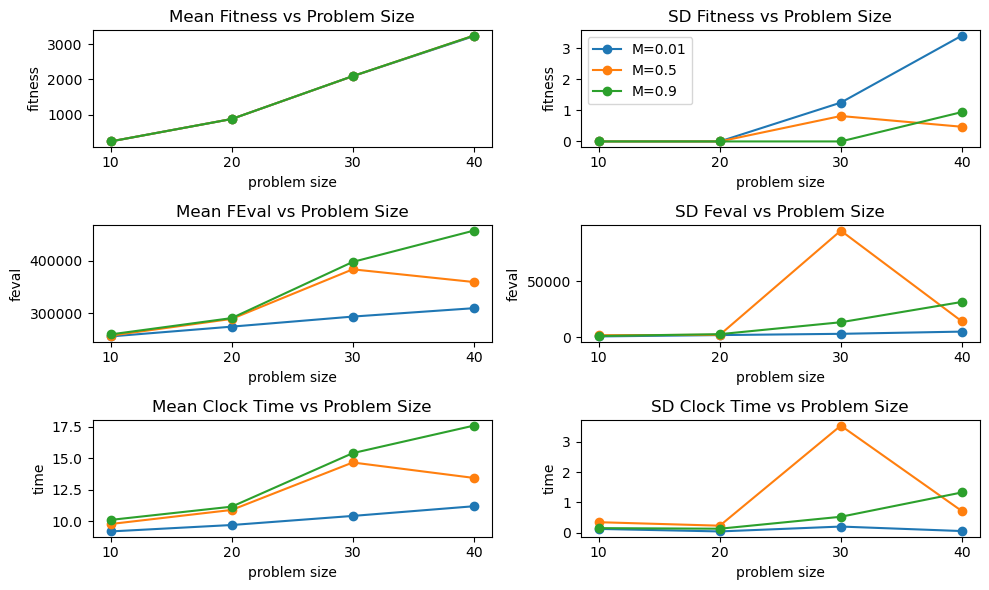

In [63]:
# Mutate stats large pop

labels = ["M="+str(mutate_rates[i]) for i in range(len(mutate_rates))]


# Mean fitness/ problem size

fig, axs = plt.subplots(3, 2,figsize=(10,6))
axs[0,0].set_title('Mean Fitness vs Problem Size')
axs[0,1].set_title('SD Fitness vs Problem Size')
axs[1,0].set_title('Mean FEval vs Problem Size')
axs[1,1].set_title('SD Feval vs Problem Size')
axs[2,0].set_title('Mean Clock Time vs Problem Size')
axs[2,1].set_title('SD Clock Time vs Problem Size')

x = problem_sizes

for ax in axs.reshape(-1):   
    ax.set_xlabel("problem size")


# fitness mean
for i in range(len(mutate_rates)):
    axs[0,0].plot(problem_sizes,
                  [fitness_mean(mutate_runs[i][j]) for j in range(len(problems))], 
                  label = labels[i],
                 marker="o")
    
axs[0,0].set_xticks(x)
axs[0,0].set_ylabel("fitness")

# fitness std
for i in range(len(mutate_rates)):
    axs[0,1].plot(problem_sizes,
                  [fitness_std(mutate_runs[i][j]) for j in range(len(problems))], 
                  label = labels[i], marker="o")
    
axs[0,1].set_xticks(x)
axs[0,1].set_ylabel("fitness")


# feval mean
for i in range(len(mutate_rates)):
    axs[1,0].plot(problem_sizes,
                  [feval_mean(mutate_runs[i][j]) for j in range(len(problems))], 
                  label = labels[i], marker="o")
    
axs[1,0].set_xticks(x)
axs[1,0].set_ylabel("feval")

# feval std
for i in range(len(mutate_rates)):
    axs[1,1].plot(problem_sizes,
                  [feval_std(mutate_runs[i][j]) for j in range(len(problems))], 
                  label = labels[i], marker="o")
    
axs[1,1].set_xticks(x)
axs[1,1].set_ylabel("feval")

# time mean
for i in range(len(mutate_rates)):
    axs[2,0].plot(problem_sizes,
                  [time_mean(mutate_runs[i][j]) for j in range(len(problems))], 
                  label = labels[i], marker="o")
    
axs[2,0].set_xticks(x)
axs[2,0].set_ylabel("time")

# time std
for i in range(len(mutate_rates)):
    axs[2,1].plot(problem_sizes,
                  [time_std(mutate_runs[i][j]) for j in range(len(problems))], 
                  label = labels[i], marker="o")
    
axs[2,1].set_xticks(x)
axs[2,1].set_ylabel("time")

axs[0,1].legend(loc= "upper left")
plt.tight_layout()
plt.show()

In [49]:
for i in range(len(mutate_rates)):
    print("RATE:",mutate_rates[i])
    print_stats(mutate_runs[i])

RATE: 0.01
***RUN STATS***
mean fitness: 236.0
VAR fitness: 0.0
STD fitness: 0.0
mean feval: 256349.33333333334
VAR feval: 727901.5555555555
STD feval: 853.1714690234054
mean runtime: 9.213118700000146
var runtime: 0.017253450699754397
STD runtime: 0.131352391298196
***RUN STATS***
mean fitness: 873.0
VAR fitness: 0.0
STD fitness: 0.0
mean feval: 274902.3333333333
VAR feval: 4236902.888888889
STD feval: 2058.3738457551603
mean runtime: 9.720263266654607
var runtime: 0.0023617059701004917
STD runtime: 0.04859738645339368
***RUN STATS***
mean fitness: 2087.6666666666665
VAR fitness: 1.5555555555555554
STD fitness: 1.247219128924647
mean feval: 293950.0
VAR feval: 10090808.666666666
STD feval: 3176.6033222085925
mean runtime: 10.437503866667006
var runtime: 0.04361771279527558
STD runtime: 0.2088485403235454
***RUN STATS***
mean fitness: 3226.3333333333335
VAR fitness: 11.555555555555557
STD fitness: 3.39934634239519
mean feval: 309835.3333333333
VAR feval: 26550246.22222222
STD feval: 51

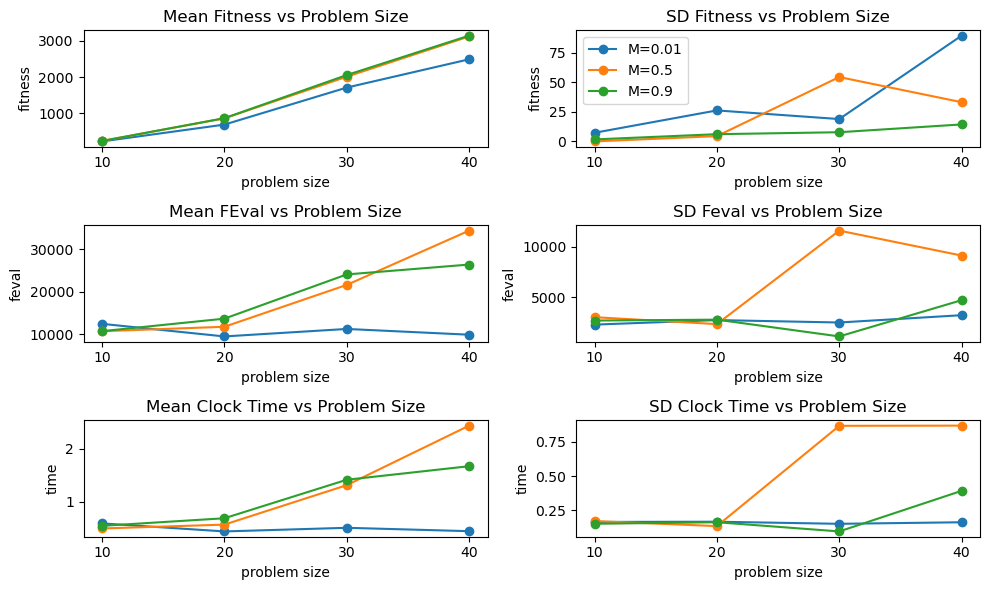

In [64]:
# Mutate stats large pop

labels = ["M="+str(mutate_rates[i]) for i in range(len(mutate_rates))]


# Mean fitness/ problem size

fig, axs = plt.subplots(3, 2,figsize=(10,6))
axs[0,0].set_title('Mean Fitness vs Problem Size')
axs[0,1].set_title('SD Fitness vs Problem Size')
axs[1,0].set_title('Mean FEval vs Problem Size')
axs[1,1].set_title('SD Feval vs Problem Size')
axs[2,0].set_title('Mean Clock Time vs Problem Size')
axs[2,1].set_title('SD Clock Time vs Problem Size')

x = problem_sizes

for ax in axs.reshape(-1):   
    ax.set_xlabel("problem size")


# fitness mean
for i in range(len(mutate_rates)):
    axs[0,0].plot(problem_sizes,
                  [fitness_mean(mutate_runs2[i][j]) for j in range(len(problems))], 
                  label = labels[i],
                 marker="o")
    
axs[0,0].set_xticks(x)
axs[0,0].set_ylabel("fitness")

# fitness std
for i in range(len(mutate_rates)):
    axs[0,1].plot(problem_sizes,
                  [fitness_std(mutate_runs2[i][j]) for j in range(len(problems))], 
                  label = labels[i], marker="o")
    
axs[0,1].set_xticks(x)
axs[0,1].set_ylabel("fitness")


# feval mean
for i in range(len(mutate_rates)):
    axs[1,0].plot(problem_sizes,
                  [feval_mean(mutate_runs2[i][j]) for j in range(len(problems))], 
                  label = labels[i], marker="o")
    
axs[1,0].set_xticks(x)
axs[1,0].set_ylabel("feval")

# feval std
for i in range(len(mutate_rates)):
    axs[1,1].plot(problem_sizes,
                  [feval_std(mutate_runs2[i][j]) for j in range(len(problems))], 
                  label = labels[i], marker="o")
    
axs[1,1].set_xticks(x)
axs[1,1].set_ylabel("feval")

# time mean
for i in range(len(mutate_rates)):
    axs[2,0].plot(problem_sizes,
                  [time_mean(mutate_runs2[i][j]) for j in range(len(problems))], 
                  label = labels[i], marker="o")
    
axs[2,0].set_xticks(x)
axs[2,0].set_ylabel("time")

# time std
for i in range(len(mutate_rates)):
    axs[2,1].plot(problem_sizes,
                  [time_std(mutate_runs2[i][j]) for j in range(len(problems))], 
                  label = labels[i], marker="o")
    
axs[2,1].set_xticks(x)
axs[2,1].set_ylabel("time")

axs[0,1].legend(loc= "upper left")
plt.tight_layout()
plt.show()

In [51]:
#EDA

# test MUTATION RATES small pop

# Genetic Algorithm
# create a runner class and solve the problem with 5 random seeds

mutate_rates = [.01, .5,.9]
mutate_runs2 = [[[] for i in range(len(problems))] for j in range(len(mutate_rates))]


for i in range(len(problems)):
    problem = problems[i]
    for k in range(len(mutate_rates)):
        for j in range(3):
            # init runner with random seed
            ga = GARunner(problem=problem,
                experiment_name='max_k_ga',
                output_directory=None, # note: specify an output directory to have results saved to disk
                seed=np.random.randint(0,1000),
                iteration_list=2 ** np.arange(13),
                population_sizes=[10],
                mutation_rates=[mutate_rates[k]])

            # the two data frames will contain the results
            df_run_stats, df_run_curves = ga.run()
            # extract best runs in terms of fitness
            best_fitness = df_run_curves['Fitness'].max()
            best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
            # extract min eval out of best fitness runs
            minimum_evaluations = best_runs['FEvals'].min()
            best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
            best_mr = best_curve_run['Mutation Rate'].iloc()[0]
            best_pop_size = best_curve_run['Population Size'].iloc()[0]
            # print(f'Best Mutation Rate: {best_mr}, best Population Size: {best_pop_size}')
            run_stats_best_run = df_run_stats[(df_run_stats['Mutation Rate'] == best_mr) & (df_run_stats['Population Size'] == best_pop_size)]

            # save run to array
            mutate_runs2[k][i].append(run_stats_best_run)


# End EDA

In [52]:
for i in range(len(mutate_rates)):
    print("RATE:",mutate_rates[i])
    for k in range(len(mutate_runs2[i])):
        print(fitness_mean(mutate_runs2[i][k]))

RATE: 0.01
220.66666666666666
686.3333333333334
1710.6666666666667
2492.6666666666665
RATE: 0.5
233.0
859.3333333333334
2011.0
3125.3333333333335
RATE: 0.9
233.66666666666666
863.6666666666666
2057.0
3147.6666666666665


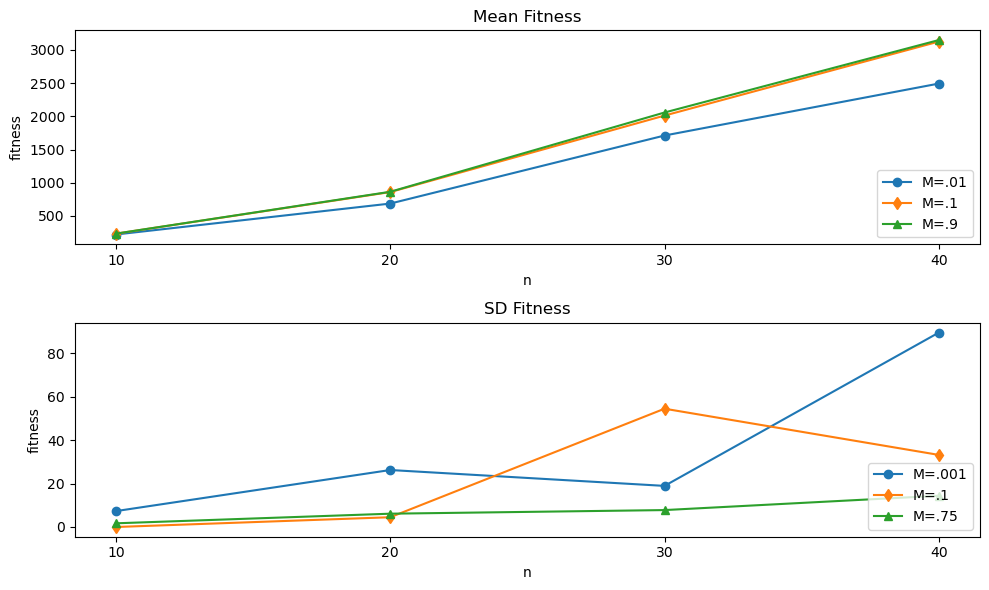

In [59]:
# Plot MUTATE fitness

x = problem_sizes

fig, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].set_title("Mean Fitness")
ax[0].set_xlabel("n")
ax[0].set_ylabel("fitness")

ax[1].set_title("SD Fitness")
ax[1].set_xlabel("n")
ax[1].set_ylabel("fitness")


y11= [fitness_mean(mutate_runs2[0][i]) for i in range(len(problem_sizes))]
y12= [fitness_mean(mutate_runs2[1][i]) for i in range(len(problem_sizes))]
y13= [fitness_mean(mutate_runs2[2][i]) for i in range(len(problem_sizes))]
ax[0].plot(x,y11,label="M=.01",marker="o")
ax[0].plot(x,y12,label="M=.1",marker="d")
ax[0].plot(x,y13,label="M=.9",marker="^")
ax[0].set_xticks(x)
ax[0].legend(loc="lower right")

y21= [fitness_std(mutate_runs2[0][i]) for i in range(len(problem_sizes))]
y22= [fitness_std(mutate_runs2[1][i]) for i in range(len(problem_sizes))]
y23= [fitness_std(mutate_runs2[2][i]) for i in range(len(problem_sizes))]
ax[1].plot(x,y21,label="M=.001",marker="o")
ax[1].plot(x,y22,label="M=.1",marker="d")
ax[1].plot(x,y23,label="M=.75",marker="^")
ax[1].set_xticks(x)
ax[1].legend(loc="lower right")

fig.tight_layout()

In [65]:
# gather initial plot stats

rhc_meanfit = []
sa_meanfit = []
ga_meanfit = []
mmc_meanfit = []
rhc_sdfit = []
sa_sdfit = []
ga_sdfit = []
mmc_sdfit = []

rhc_meanfev = []
sa_meanfev = []
ga_meanfev = []
mmc_meanfev = []
rhc_sdfev = []
sa_sdfev = []
ga_sdfev = []
mmc_sdfev = []

rhc_meantime = []
sa_meantime = []
ga_meantime = []
mmc_meantime = []
rhc_sdtime = []
sa_sdtime = []
ga_sdtime = []
mmc_sdtime = []

for i in range(len(problems)):
    rhc_meanfit.append(fitness_mean(rhc_runs[i]))
    sa_meanfit.append(fitness_mean(sa_runs[i]))
    ga_meanfit.append(fitness_mean(ga_runs[i]))
    mmc_meanfit.append(fitness_mean(mmc_runs[i]))
    rhc_sdfit.append(fitness_std(rhc_runs[i]))
    sa_sdfit.append(fitness_std(sa_runs[i]))
    ga_sdfit.append(fitness_std(ga_runs[i]))
    mmc_sdfit.append(fitness_std(mmc_runs[i]))
    
    rhc_meanfev.append(feval_mean(rhc_runs[i]))
    sa_meanfev.append(feval_mean(sa_runs[i]))
    ga_meanfev.append(feval_mean(ga_runs[i]))
    mmc_meanfev.append(feval_mean(mmc_runs[i]))
    rhc_sdfev.append(feval_std(rhc_runs[i]))
    sa_sdfev.append(feval_std(sa_runs[i]))
    ga_sdfev.append(feval_std(ga_runs[i]))
    mmc_sdfev.append(feval_std(mmc_runs[i]))
    
    rhc_meantime.append(time_mean(rhc_runs[i]))
    sa_meantime.append(time_mean(sa_runs[i]))
    ga_meantime.append(time_mean(ga_runs[i]))
    mmc_meantime.append(time_mean(mmc_runs[i]))
    rhc_sdtime.append(time_std(rhc_runs[i]))
    sa_sdtime.append(time_std(sa_runs[i]))
    ga_sdtime.append(time_std(ga_runs[i]))
    mmc_sdtime.append(time_std(mmc_runs[i]))


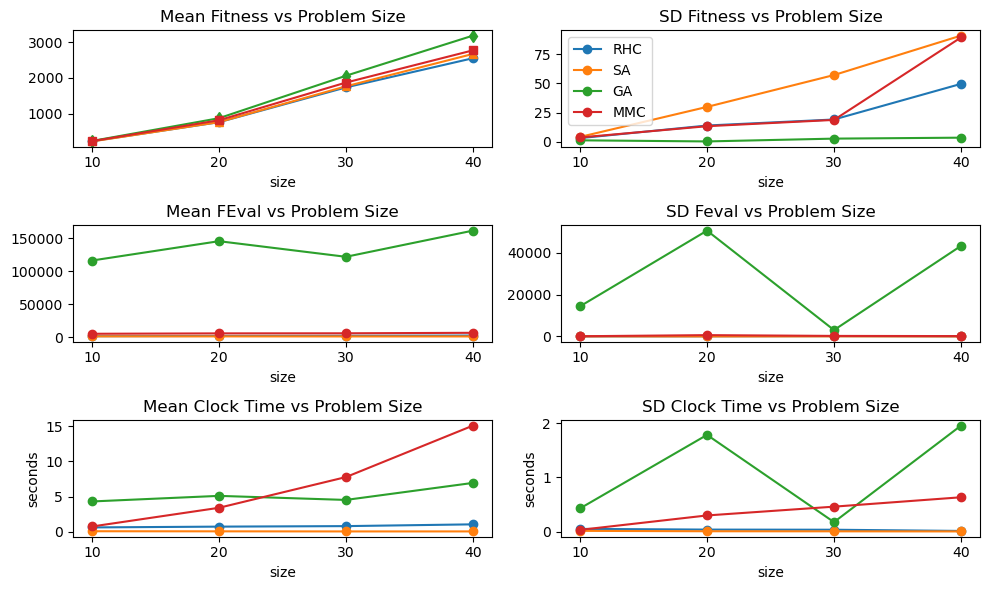

In [67]:
# Mean fitness/ problem size

fig, axs = plt.subplots(3, 2,figsize=(10,6))
axs[0,0].set_title('Mean Fitness vs Problem Size')
axs[0,1].set_title('SD Fitness vs Problem Size')
axs[1,0].set_title('Mean FEval vs Problem Size')
axs[1,1].set_title('SD Feval vs Problem Size')
axs[2,0].set_title('Mean Clock Time vs Problem Size')
axs[2,1].set_title('SD Clock Time vs Problem Size')

x = problem_sizes

for ax in axs.reshape(-1):   
    ax.set_xlabel("size")


# fitness mean
axs[0,0].plot(x, rhc_meanfit, label="RHC", marker="o")
axs[0,0].plot(x, sa_meanfit, label="SA",marker="^")
axs[0,0].plot(x, ga_meanfit, label="GA",marker="d")
axs[0,0].plot(x, mmc_meanfit, label="MMC",marker="s")
axs[0,0].set_xticks(x)

#fitness sd

axs[0,1].plot(x, rhc_sdfit, label="RHC", marker="o")
axs[0,1].plot(x, sa_sdfit, label="SA",marker="o")
axs[0,1].plot(x, ga_sdfit, label="GA",marker="o")
axs[0,1].plot(x, mmc_sdfit, label="MMC",marker="o")
axs[0,1].set_xticks(x)

#feval mean

axs[1,0].plot(x, rhc_meanfev, label="RHC", marker="o")
axs[1,0].plot(x, sa_meanfev, label="SA",marker="o")
axs[1,0].plot(x, ga_meanfev, label="GA",marker="o")
axs[1,0].plot(x, mmc_meanfev, label="MMC",marker="o")
axs[1,0].set_xticks(x)

# feval sd

axs[1,1].plot(x, rhc_sdfev, label="RHC", marker="o")
axs[1,1].plot(x, sa_sdfev, label="SA",marker="o")
axs[1,1].plot(x, ga_sdfev, label="GA",marker="o")
axs[1,1].plot(x, mmc_sdfev, label="MMC",marker="o")
axs[1,1].set_xticks(x)

#time mean

axs[2,0].plot(x, rhc_meantime, label="RHC", marker="o")
axs[2,0].plot(x, sa_meantime, label="SA",marker="o")
axs[2,0].plot(x, ga_meantime, label="GA",marker="o")
axs[2,0].plot(x, mmc_meantime, label="MMC",marker="o")
axs[2,0].set_xticks(x)
axs[2,0].set_ylabel("seconds")

#time sd

axs[2,1].plot(x, rhc_sdtime, label="RHC", marker="o")
axs[2,1].plot(x, sa_sdtime, label="SA",marker="o")
axs[2,1].plot(x, ga_sdtime, label="GA",marker="o")
axs[2,1].plot(x, mmc_sdtime, label="MMC",marker="o")
axs[2,1].set_xticks(x)
axs[2,1].set_ylabel("seconds")

axs[0,1].legend(loc="upper left")
plt.tight_layout()
plt.show()

In [56]:
# generate feval/iteration list

# n = 10
rhc_feval10 = rhc_runs[0][0]["FEvals"].values.tolist()
rhc_fit10 =  rhc_runs[0][0]["Fitness"].values.tolist()

sa_feval10 = sa_runs[0][0]["FEvals"].values.tolist()
sa_fit10 =  sa_runs[0][0]["Fitness"].values.tolist()

ga_feval10 = ga_runs[0][0]["FEvals"].values.tolist()
ga_fit10 =  ga_runs[0][0]["Fitness"].values.tolist()

mmc_feval10 = mmc_runs[0][0]["FEvals"].values.tolist()
mmc_fit10 =  mmc_runs[0][0]["Fitness"].values.tolist()


# n = 40
rhc_feval40 = rhc_runs[3][0]["FEvals"].values.tolist()
rhc_fit40 =  rhc_runs[3][0]["Fitness"].values.tolist()

sa_feval40 = sa_runs[3][0]["FEvals"].values.tolist()
sa_fit40 =  sa_runs[3][0]["Fitness"].values.tolist()

ga_feval40 = ga_runs[3][0]["FEvals"].values.tolist()
ga_fit40 =  ga_runs[3][0]["Fitness"].values.tolist()

mmc_feval40 = mmc_runs[3][0]["FEvals"].values.tolist()
mmc_fit40 =  mmc_runs[3][0]["Fitness"].values.tolist()


In [1]:
# Group fitness curve

sa_x1 = sa_runs[3][0]["Iteration"][:12].values.tolist()
sa_y1 = sa_runs[3][0]["Fitness"][:12].values.tolist()
sa_x2 = sa_runs[3][0]["Time"][:10].values.tolist()
sa_y2 = sa_runs[3][0]["Fitness"][:10].values.tolist()
sa_x3 = sa_runs[3][0]["FEvals"].values.tolist()
sa_y3 = sa_runs[3][0]["Fitness"].values.tolist()

ga_x1 = ga_runs[3][0]["Iteration"][:12].values.tolist()
ga_y1 = ga_runs[3][0]["Fitness"][:12].values.tolist()
ga_x2 = ga_runs[3][0]["Time"][:10].values.tolist()
ga_y2 = ga_runs[3][0]["Fitness"][:10].values.tolist()
ga_x3 = sa_runs[3][0]["FEvals"].values.tolist()
ga_y3 = sa_runs[3][0]["Fitness"].values.tolist()

mmc_x1 = mmc_runs[3][0]["Iteration"][:12].values.tolist()
mmc_y1 = mmc_runs[3][0]["Fitness"][:12].values.tolist()
mmc_x2 = mmc_runs[3][0]["Time"][:10].values.tolist()
mmc_y2 = mmc_runs[3][0]["Fitness"][:10].values.tolist()
mmc_x3 = sa_runs[3][0]["FEvals"].values.tolist()
mmc_y3 = sa_runs[3][0]["Fitness"].values.tolist()

fig, ax = plt.subplots(2,1)

ax[0].set_title("Fitness/Iteration (N = 40)")
ax[1].set_title("Fitness/Time (N = 40)")

ax[0].plot(sa_x1, sa_y1, label="SA")  
ax[0].plot(ga_x1, ga_y1, label="GA")  
ax[0].plot(mmc_x1, mmc_y1, label="MMC")
ax[0].set_xlabel("iteration")
ax[0].set_ylabel("fitness")
ax[0].legend(loc="upper right")

ax[1].plot(sa_x2, sa_y2, label="SA") 
ax[1].plot(ga_x2, ga_y2, label="GA")  
ax[1].plot(mmc_x2, mmc_y2, label="MMC")  
ax[1].set_xlabel("time")
ax[1].set_ylabel("fitness")
ax[1].legend(loc="upper right")


fig.tight_layout()

NameError: name 'sa_runs' is not defined

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters
0,0,1817.0,0,0.000053,"[12, 2, 13, 6, 9, 4, 19, 14, 1, 16, 14, 8, 7, ...",geometric,1000,0.99,0.001,999.999471,1000,8192
1,1,1815.0,2,0.000771,"[12, 2, 13, 6, 9, 4, 19, 14, 1, 16, 14, 8, 7, ...",geometric,1000,0.99,0.001,999.992250,1000,8192
2,2,1847.0,4,0.001481,"[12, 2, 13, 6, 9, 4, 19, 14, 1, 16, 14, 8, 7, ...",geometric,1000,0.99,0.001,999.985119,1000,8192
3,4,1889.0,8,0.002128,"[12, 2, 13, 6, 9, 4, 19, 14, 1, 16, 14, 8, 7, ...",geometric,1000,0.99,0.001,999.978608,1000,8192
4,8,1912.0,16,0.002978,"[12, 2, 4, 6, 9, 4, 19, 14, 1, 16, 14, 7, 7, 1...",geometric,1000,0.99,0.001,999.970071,1000,8192
5,16,1953.0,32,0.004008,"[12, 2, 4, 6, 15, 4, 19, 14, 1, 16, 14, 7, 7, ...",geometric,1000,0.99,0.001,999.959715,1000,8192
6,32,2069.0,63,0.005730,"[12, 2, 4, 6, 15, 18, 19, 14, 9, 16, 4, 7, 7, ...",geometric,1000,0.99,0.001,999.942418,1000,8192
7,64,2372.0,123,0.007460,"[12, 14, 4, 3, 18, 18, 19, 14, 18, 8, 4, 16, 7...",geometric,1000,0.99,0.001,999.925030,1000,8192
8,128,2041.0,247,0.011337,"[12, 8, 11, 3, 9, 5, 6, 17, 13, 1, 4, 13, 16, ...",geometric,1000,0.99,0.001,999.886066,1000,8192
9,256,2175.0,482,0.023069,"[12, 13, 10, 14, 17, 14, 16, 15, 0, 16, 19, 4,...",geometric,1000,0.99,0.001,999.768171,1000,8192
